## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(\omega, x)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

#Punto 1
Ecuación diferencial a resolver $\ddot{x}+\omega^2 x = 0$

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import pandas as pd

In [ ]:
def osc(init_conditions, t, param):

  m , k = param
  x0, v0 = init_conditions

  W = k/m #Velocidad angular

  #Ec diferencial
  
  a = -1* W * x0

  return [v0, a]


In [ ]:
#Condiciones iniciales
m = 50 #Cantidad de configuraciones

x0 = np.random.uniform(0,1, m) #Posicion inicial
v0 = np.random.uniform(0,1, m) #Velocidad inicial
m = 0.2 # Masa
k = 1 #Constante elastica

t = np.linspace(0, 100, 1000)


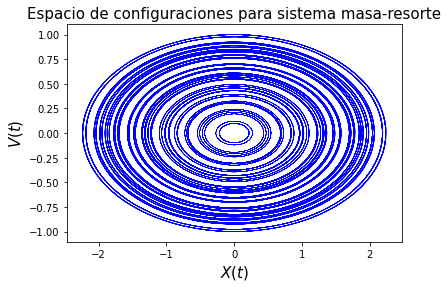

In [ ]:
#Espacio de configuraciones
for x, v in zip(x0, v0):

  init_conditions = [x, v]
  param = [m , k]

  #Solucion a la ED
  solutions = integrate.odeint(osc, init_conditions, t, args = (param, ))

  #Grafica del espacio
  plt.plot(solutions[:,1], solutions[:,0], 'b-', lw = 0.1)

plt.title('Espacio de configuraciones para sistema masa-resorte', size = 15)
plt.xlabel('$X(t)$', size = 15)
plt.ylabel('$V(t)$', size = 15)
plt.show()

#Punto 2


In [ ]:
#Importando los datos

df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


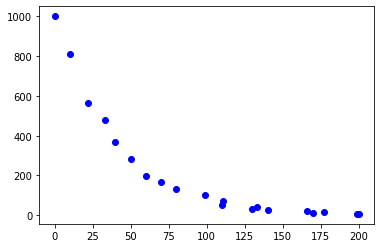

In [86]:
#Grafica de los datos
t = df.t
N = df.iloc[:,1]

plt.plot(t, N, 'bo')


In [145]:
#Condiciones iniciales
N0 = 1000 #Nucleos iniciales

def fit(T, l):
  return N0 * np.exp(-1*l*T)

#Fit
T = np.linspace(0, 200, 100)
a, b = optimize.curve_fit(fit, t, N)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [144]:
a #Constante de decaimiento

array([0.02476265])

In [131]:
np.sqrt(b) #Error para lambda

array([[0.00036172]])

El valor que nos arroja a es el valor de la constante de decaimiento $\lambda = 0.02476265 \pm 0.00036172$

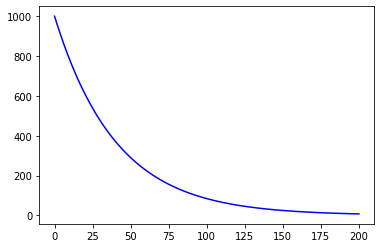

In [146]:
#Grafica del fit
l = a[0]
plt.plot(T, fit(T, l), 'b-', label = 'Fit')

In [143]:
#Tiempo de vida media
tau = np.log(2)/l

#Error
Error = float(np.sqrt(b)/l)

print(tau)
print(Error)

27.991641498383633
0.014607350500572198


EL tiempo de vida media es $\tau = 27.9916 \pm 0.0146074$

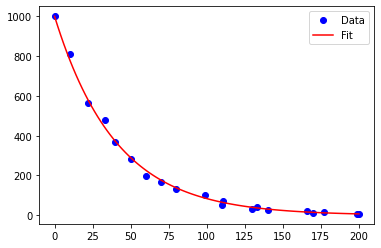

In [130]:
#Comparacion de los datos y el fit

plt.plot(t, N, 'bo', label = 'Data')
plt.plot(T, fit(T, l), 'r-', label = 'Fit' )
plt.legend()